In [1]:
#autoreload so we can change the data without restarting kernel
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
from matplotlib.transforms import Bbox
import numpy as np
from collections import OrderedDict
from PredictionData.ExamplePredictions import *
from Scripts.PlottingScripts import plot_matches, plot_ranking, plot_significance, plot_trysq
from Scripts.AnalysisScripts import calc_trysq

from copy import deepcopy

# Tournament Tracking

In [2]:
# Collect up all of the game info for each week so we can do week-by-week and full tournament analysis
# Shape is: game_info["WeekX"] = [list_of_games_as_string_tuple,predictions_dict,final_score_dict] 
game_info = {}

# Week 1

In [3]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.ExamplePredictions import predictions_wk1

games = [("France","Ireland"),("Italy","England"),("Wales","Scotland")]

FinalScore = {
    ("France","Ireland"):(17,38),
    ("Italy","England"):(24,27),
    ("Wales","Scotland"):(26,27),
}
game_info["Week1"] = [games,predictions_wk1,FinalScore]
game_info["All"] = [deepcopy(games),deepcopy(predictions_wk1),deepcopy(FinalScore)]


In [4]:
predictions = predictions_wk1 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

/Users/jonathanjamieson/.venv/Py3_StatAnalysis_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


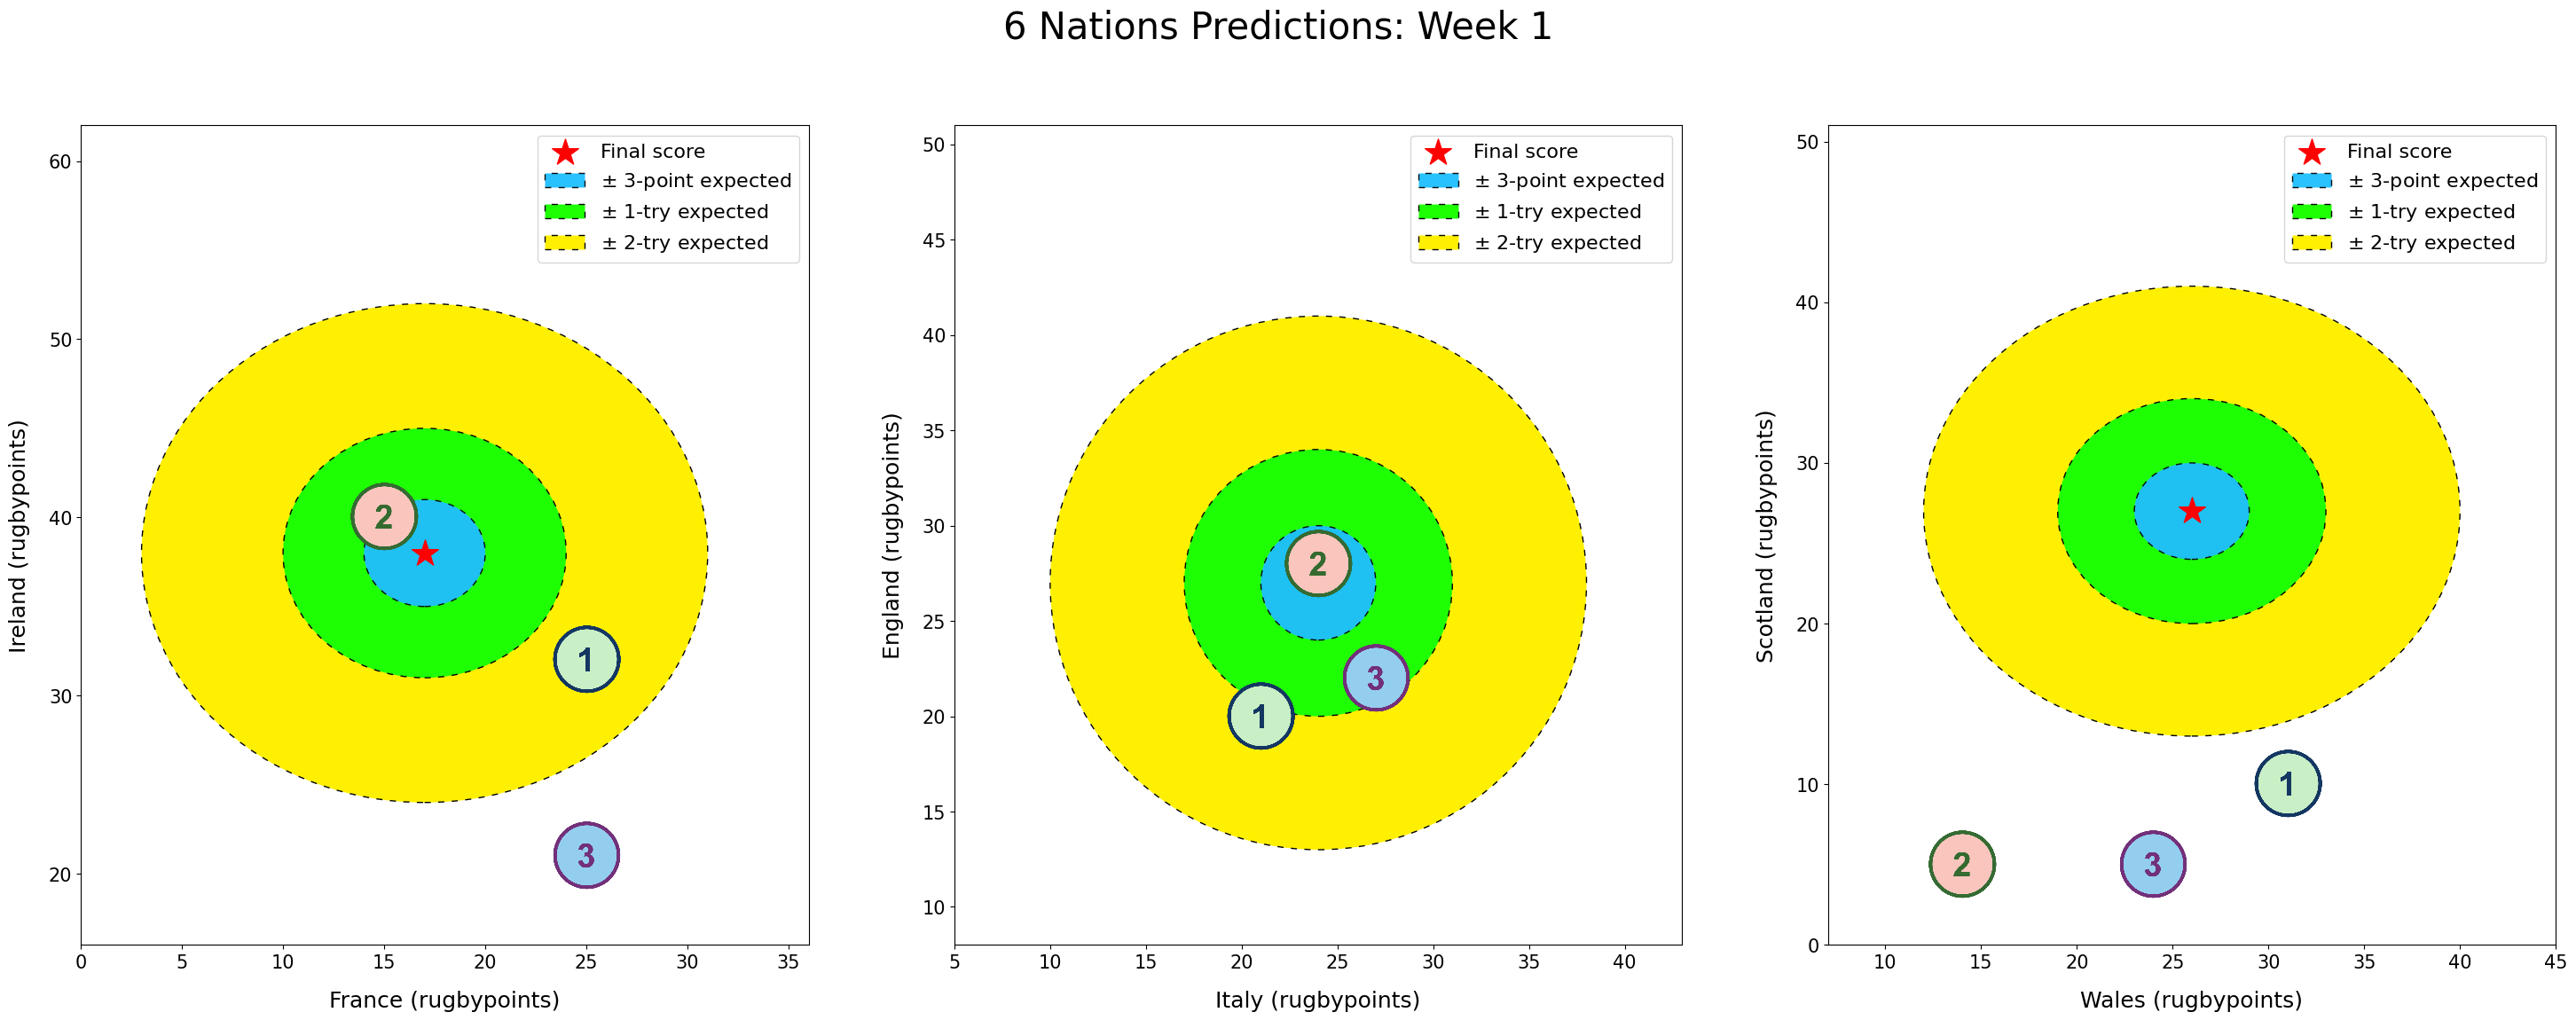

In [5]:
one_fig_width = 9.75
one_fig_height = 10.75
marginLR = 3.5
marginUD = 0.25
fig, axs = plt.subplots(1,3,figsize=(36, 12),layout='tight') #Make seperate axes for each game
plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3)
plt.suptitle('6 Nations Predictions: Week 1',size=30,y=0.99)
plt.show()
fig.savefig("Plots/Week1/SixN_Week1_AllGames_Example.png")
#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    #extent = ax.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted()) #Stopped working for some reason
    custom_crop = Bbox(np.array([[marginLR + i*one_fig_width, marginUD],[marginLR + (i+1)*one_fig_width, marginUD+one_fig_height]])) #Do it manually
    fig.savefig("Plots/Week1/SixN_Week1_Game"+str(i+1)+"_Example.png", bbox_inches=custom_crop)


### Ranking plot

Combined try^2: 
{'player3': 0.8134920634920635, 'player1': 0.7345068330362448, 'player2': 0.40990896358543416}


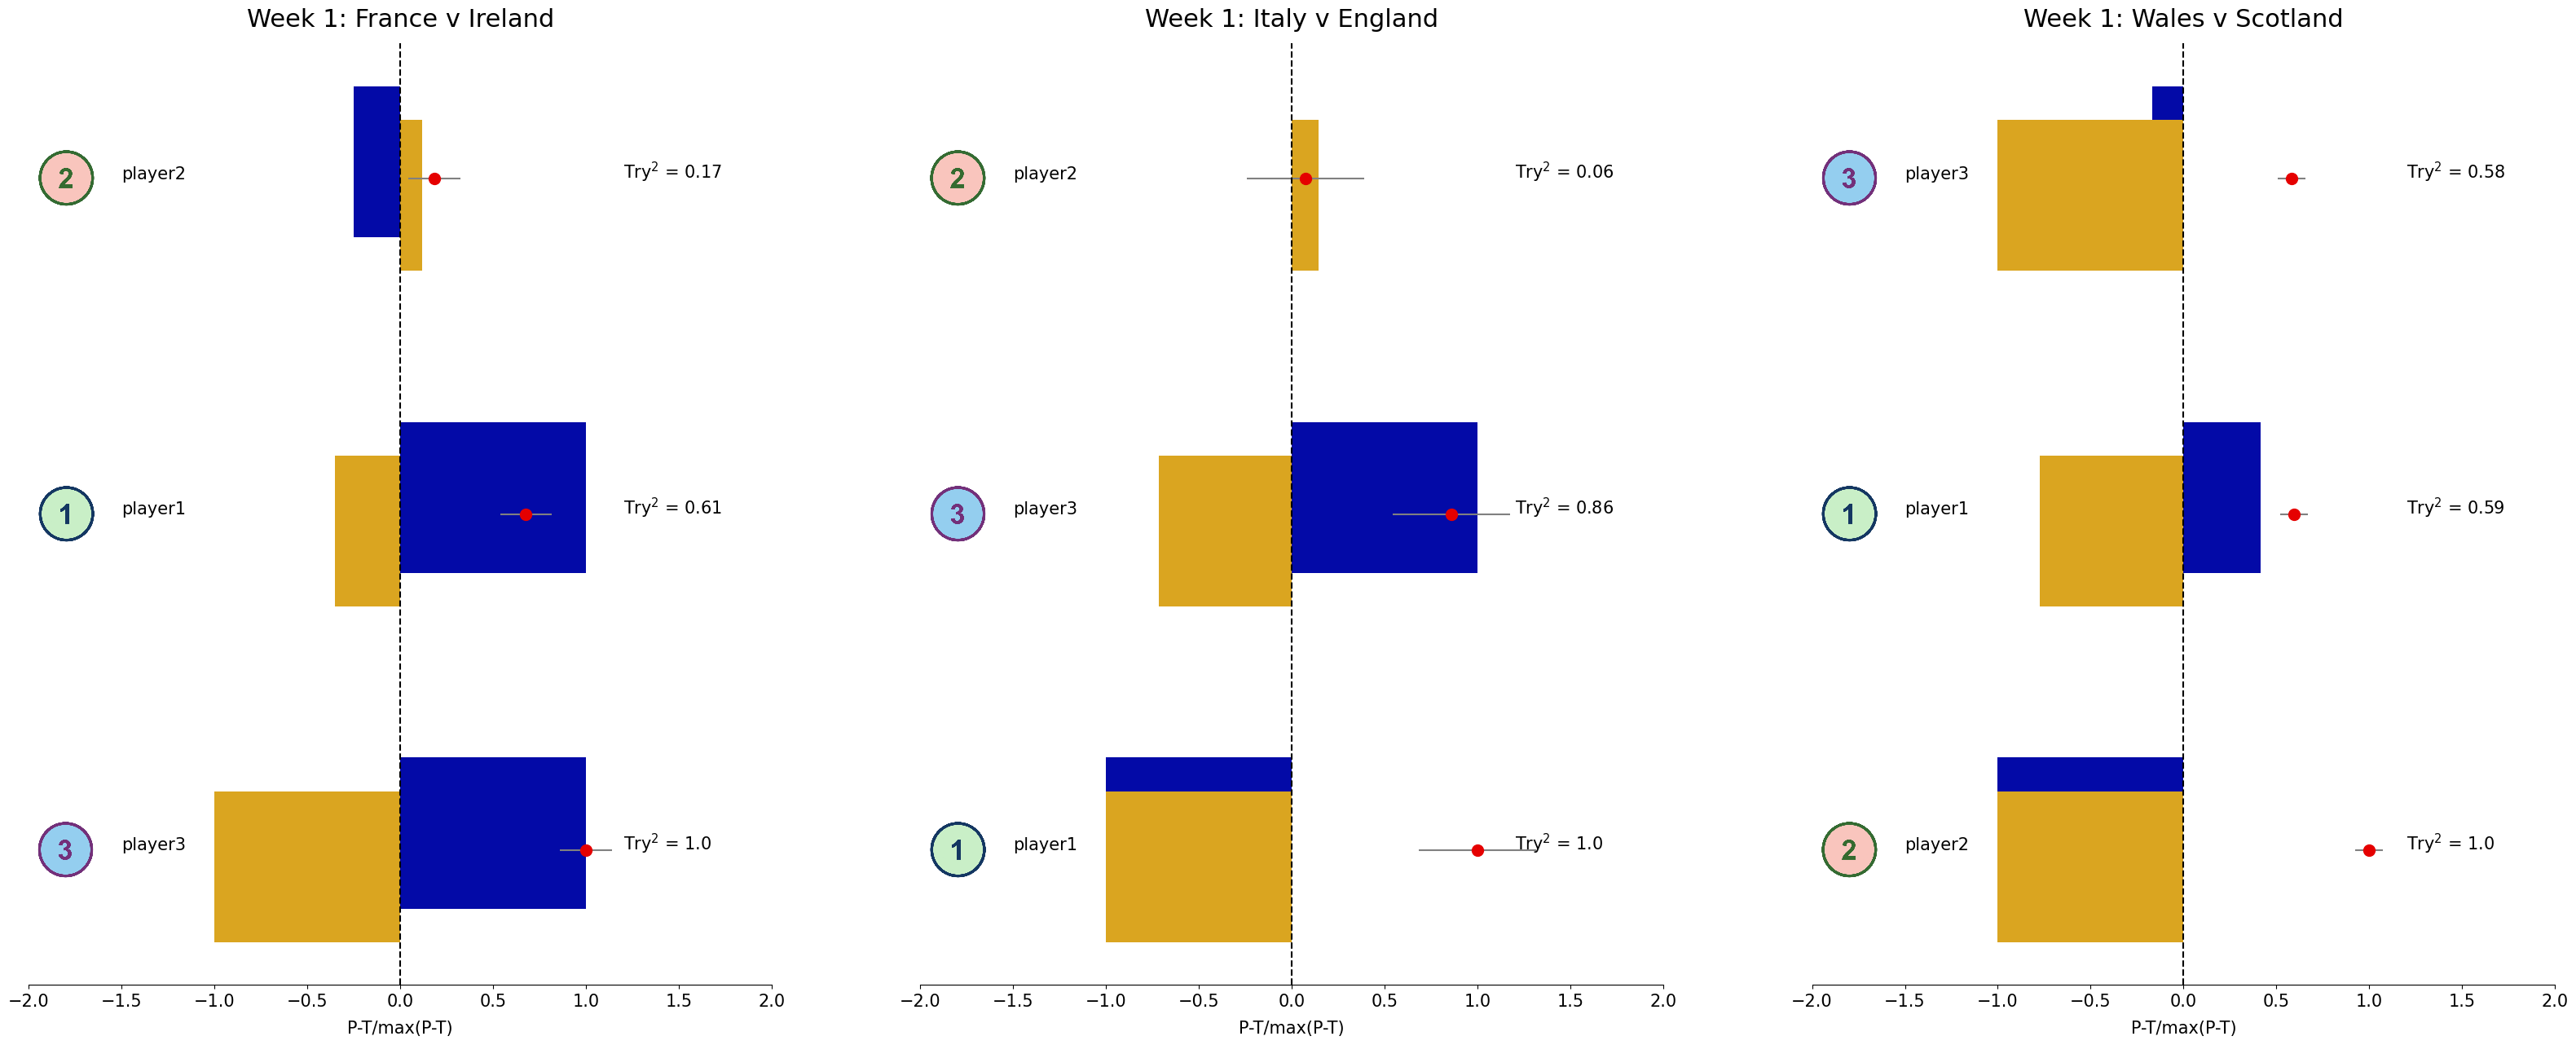

In [6]:
one_fig_width = 10.7
one_fig_height = 12.75
marginLR = 4.5
marginUD = 1.0
fig, axs = plt.subplots(1,3,figsize=(40, 15))
plt.subplots_adjust(wspace=0.2)
plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=1,draw_markers=True)
fig.savefig("Plots/Week1/SixN_Week1_Rankings_AllGames_Example.png")
for i,ax in enumerate(axs):
    custom_crop = Bbox(np.array([[marginLR + i*one_fig_width, marginUD],[marginLR + (i+1)*one_fig_width, marginUD+one_fig_height]])) #Do it manually
    fig.savefig("Plots/Week1/SixN_Week1_Rankings_Game"+str(i)+"_Example.png", bbox_inches=custom_crop)


# Week 2

In [7]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.ExamplePredictions import predictions_wk2

games = [("Scotland","France"),("England","Wales"),("Ireland","Italy")]
FinalScore = {
    ("Scotland","France"):(16,20),
    ("England","Wales"):(16,14),
    ("Ireland","Italy"):(36,0),
}
game_info["Week2"] = [games,predictions_wk2,FinalScore]

game_info["All"][0] += deepcopy(games)
for name, preds in deepcopy(predictions_wk2).items():
    if name in game_info["All"][1].keys():
        game_info["All"][1][name].update(preds)
    else:
        game_info["All"][1][name] = preds
game_info["All"][2].update(deepcopy(FinalScore))

In [8]:
predictions = predictions_wk2 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

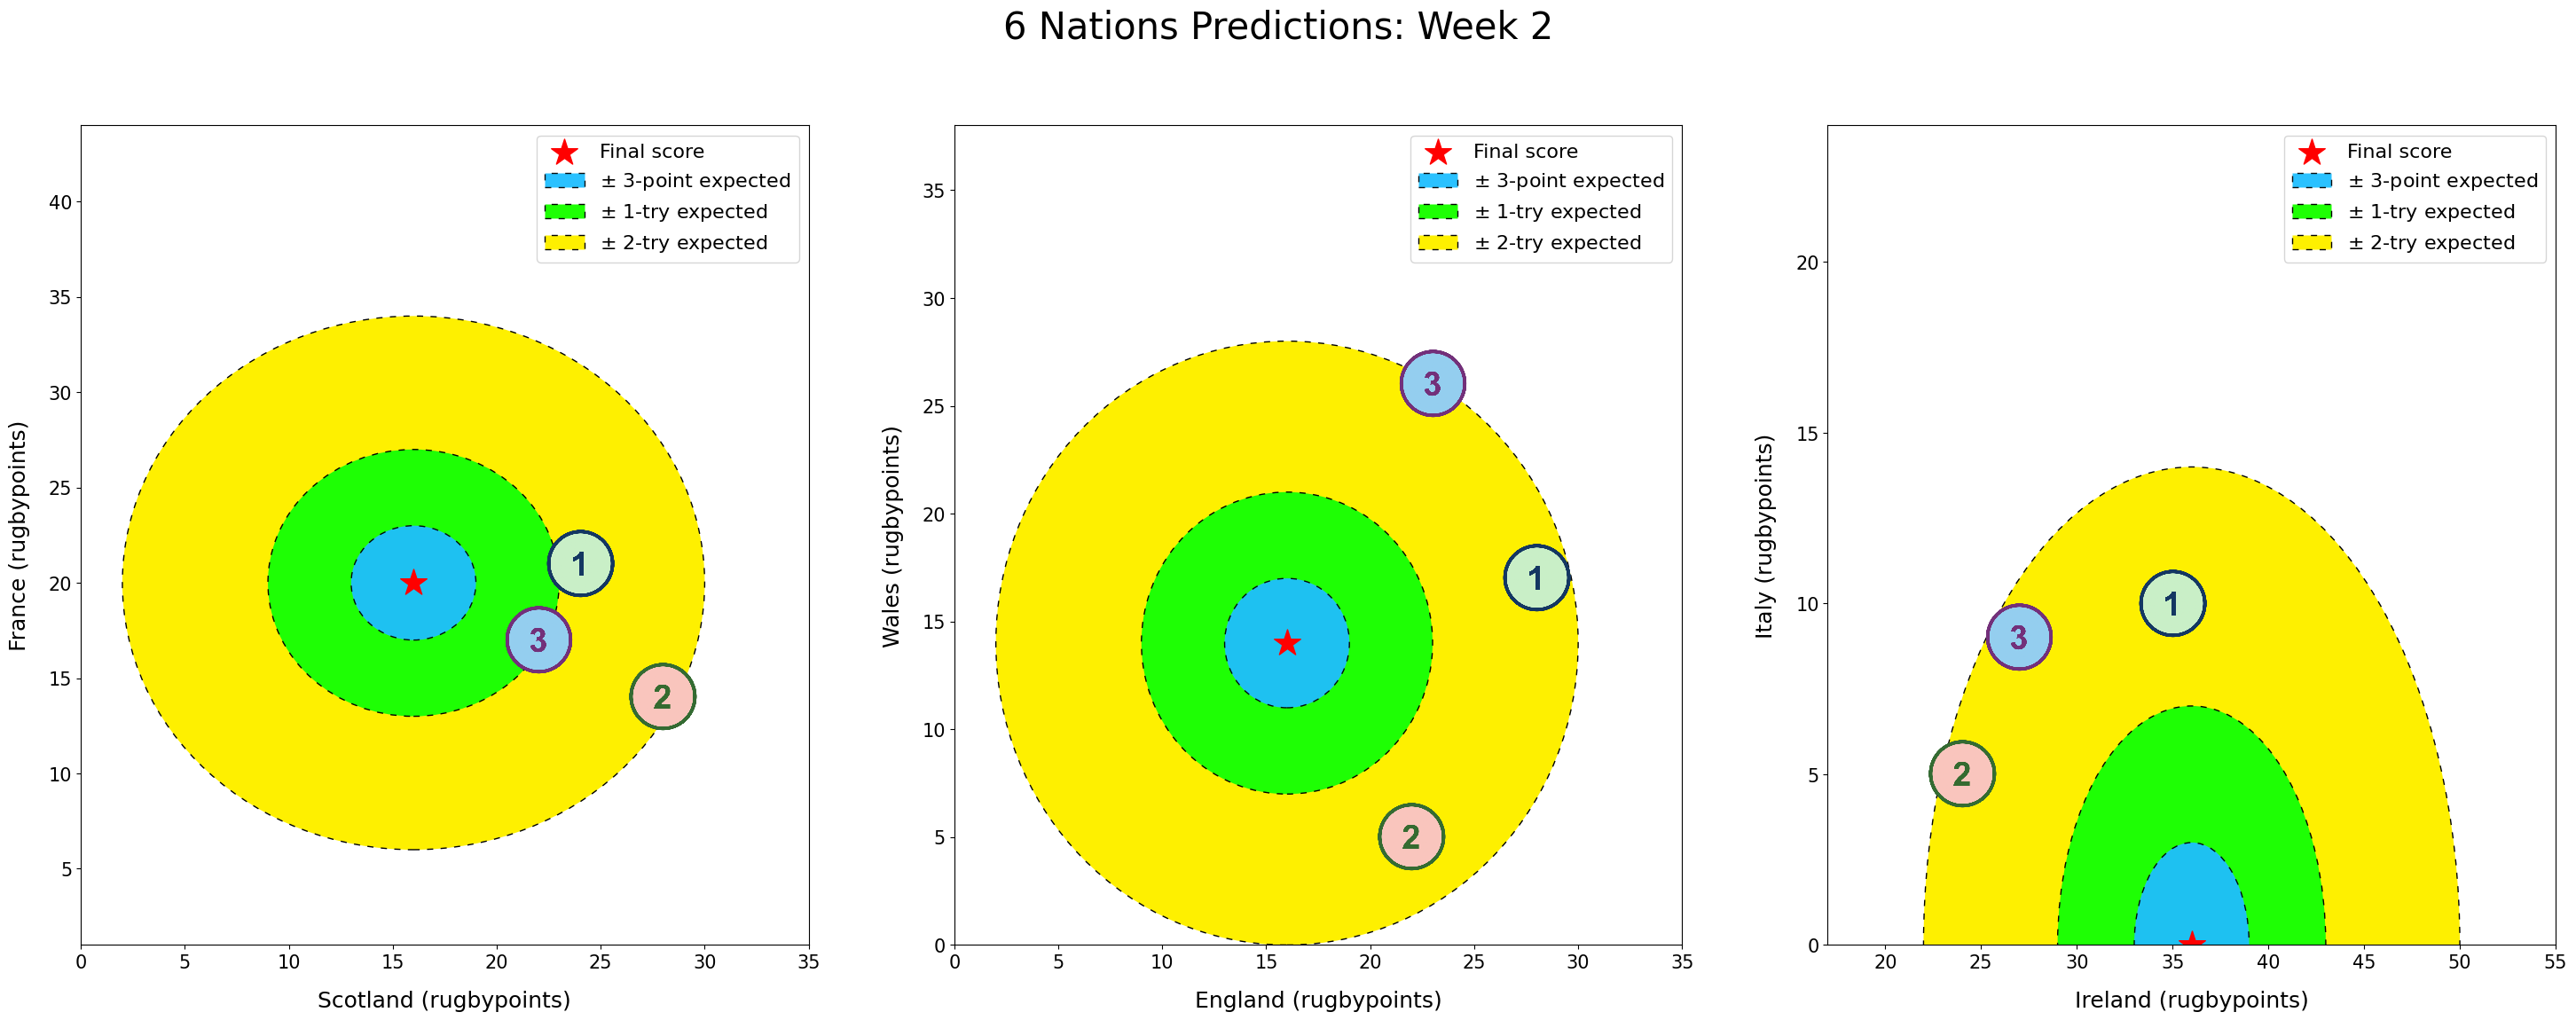

In [9]:

one_fig_width = 9.75
one_fig_height = 10.75
marginLR = 3.5
marginUD = 0.25
fig, axs = plt.subplots(1,3,figsize=(36, 12),layout='tight') #Make seperate axes for each game
plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3)
plt.suptitle('6 Nations Predictions: Week 2',size=30,y=0.99)
plt.show()
fig.savefig("Plots/Week2/SixN_Week2_AllGames_Example.png")
#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    custom_crop = Bbox(np.array([[marginLR + i*one_fig_width, marginUD],[marginLR + (i+1)*one_fig_width, marginUD+one_fig_height]])) #Do it manually
    fig.savefig("Plots/Week2/SixN_Week2_Game"+str(i+1)+"_Example.png", bbox_inches=custom_crop)



### Ranking plot

Combined try^2: 
{'player2': 0.7458333333333332, 'player3': 0.6780555555555555, 'player1': 0.4888888888888888}


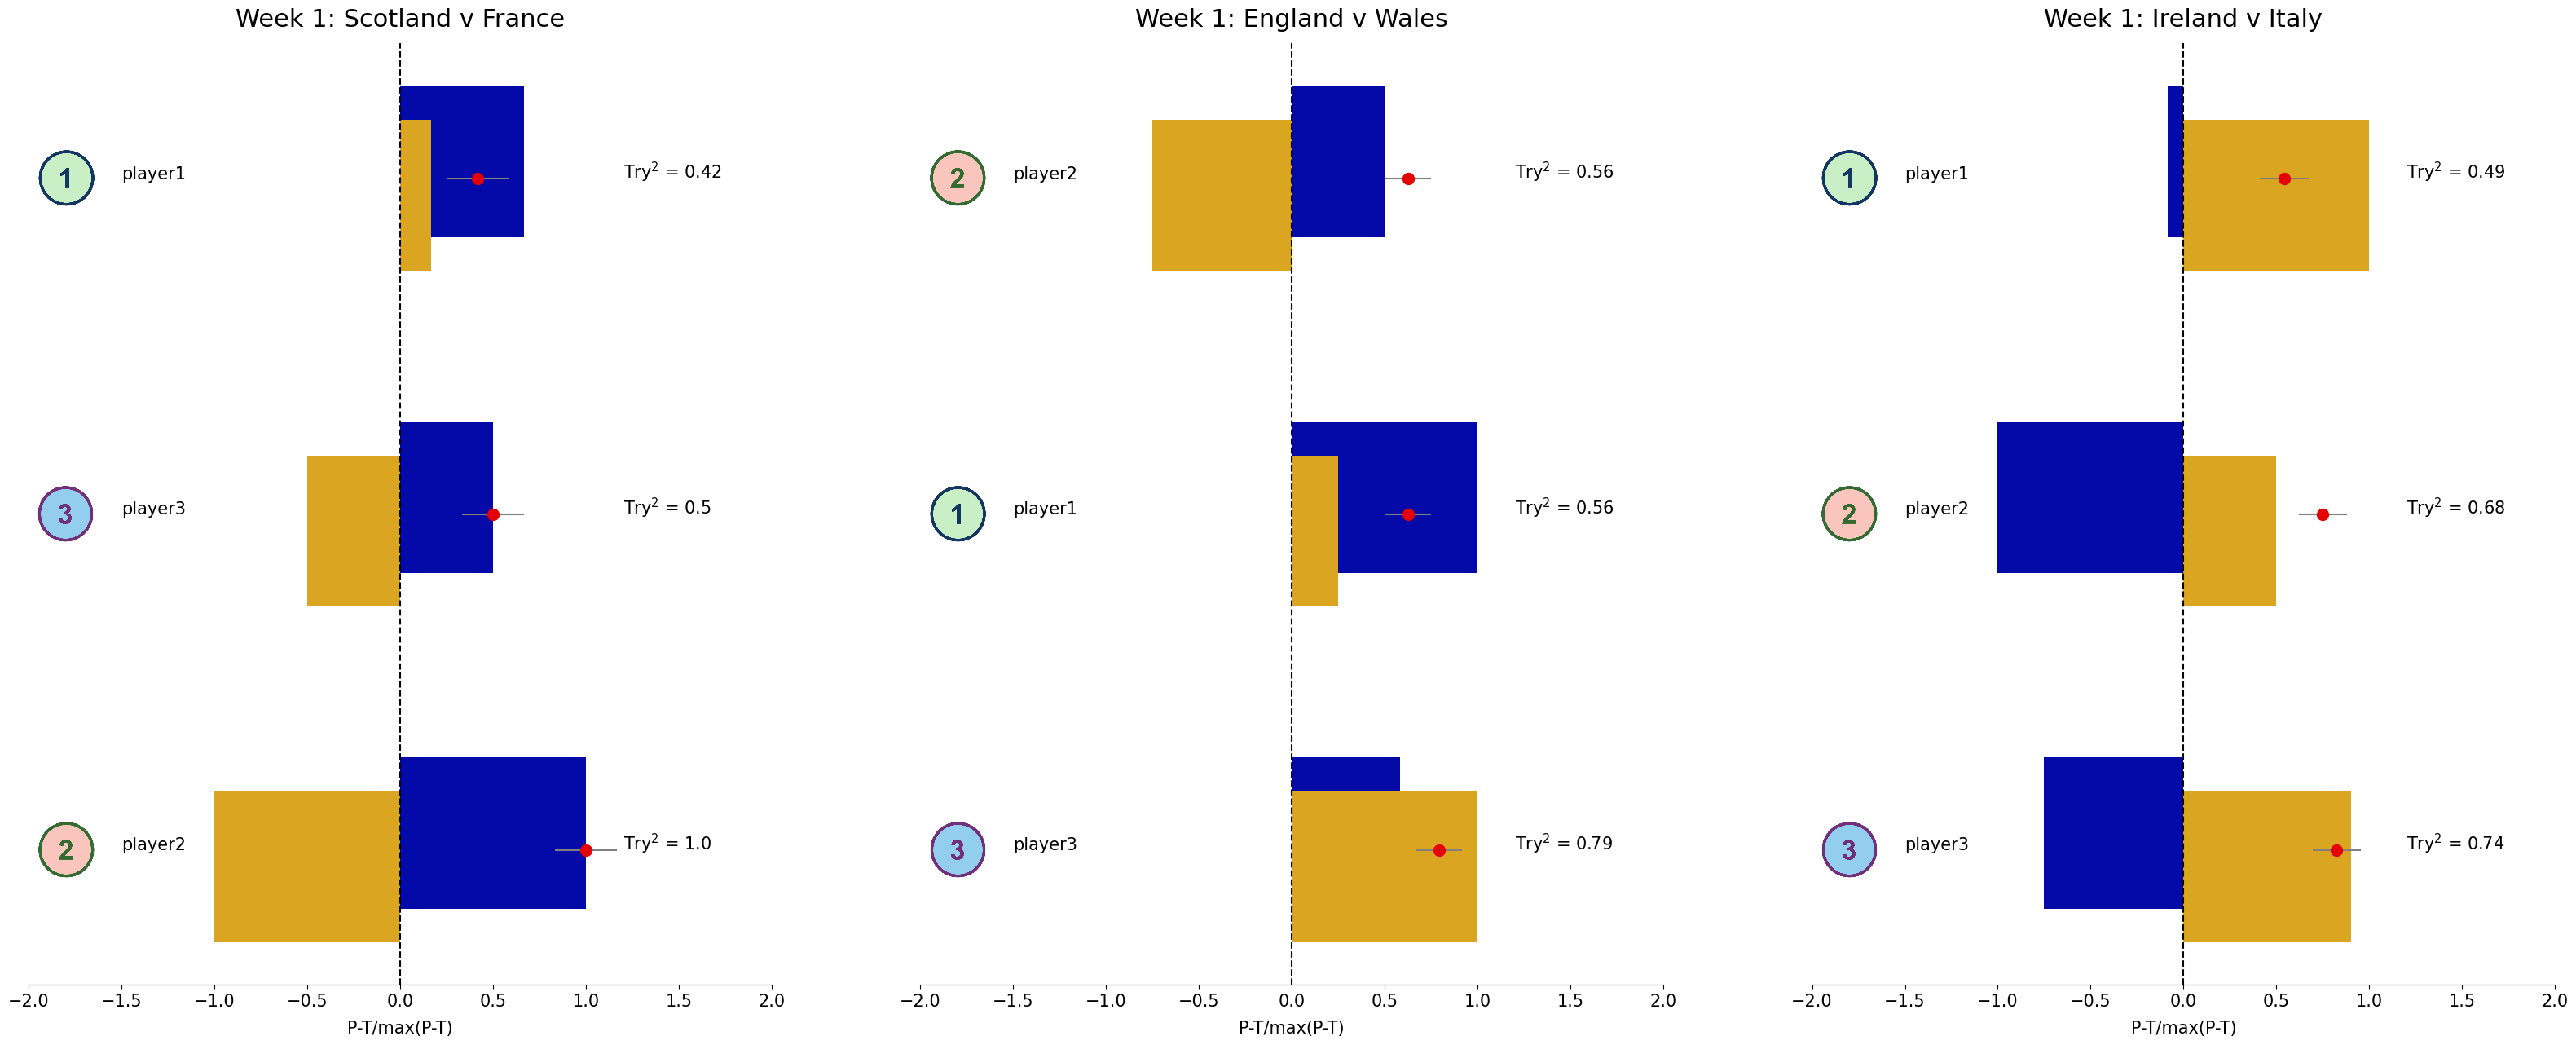

In [10]:
one_fig_width = 10.7
one_fig_height = 12.75
marginLR = 4.5
marginUD = 1.0
fig, axs = plt.subplots(1,3,figsize=(40, 15))
plt.subplots_adjust(wspace=0.2)
plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=1,draw_markers=True)
fig.savefig("Plots/Week2/SixN_Week2_Rankings_AllGames_Example.png")
for i,ax in enumerate(axs):
    custom_crop = Bbox(np.array([[marginLR + i*one_fig_width, marginUD],[marginLR + (i+1)*one_fig_width, marginUD+one_fig_height]])) #Do it manually
    fig.savefig("Plots/Week2/SixN_Week2_Rankings_Game"+str(i)+"_Example.png", bbox_inches=custom_crop)

# Tournament Try^2

In [11]:
do_norm = True
all_try_sq = {}
for week,info in game_info.items():
    games = info[0]
    predictions = info[1]
    ordered_predictions = OrderedDict(predictions)
    FinalScore = info[2]
    all_try_sq[week],_ = calc_trysq(games,ordered_predictions,FinalScore,win_SF=0.9,do_norm=do_norm)
    print(week)
    print(all_try_sq[week]['combined'])

Week1
{'player3': 0.8134920634920635, 'player1': 0.7345068330362448, 'player2': 0.40990896358543416}
All
{'player3': 0.7457738095238096, 'player1': 0.6116978609625668, 'player2': 0.5778711484593838}
Week2
{'player2': 0.7458333333333332, 'player3': 0.6780555555555555, 'player1': 0.4888888888888888}


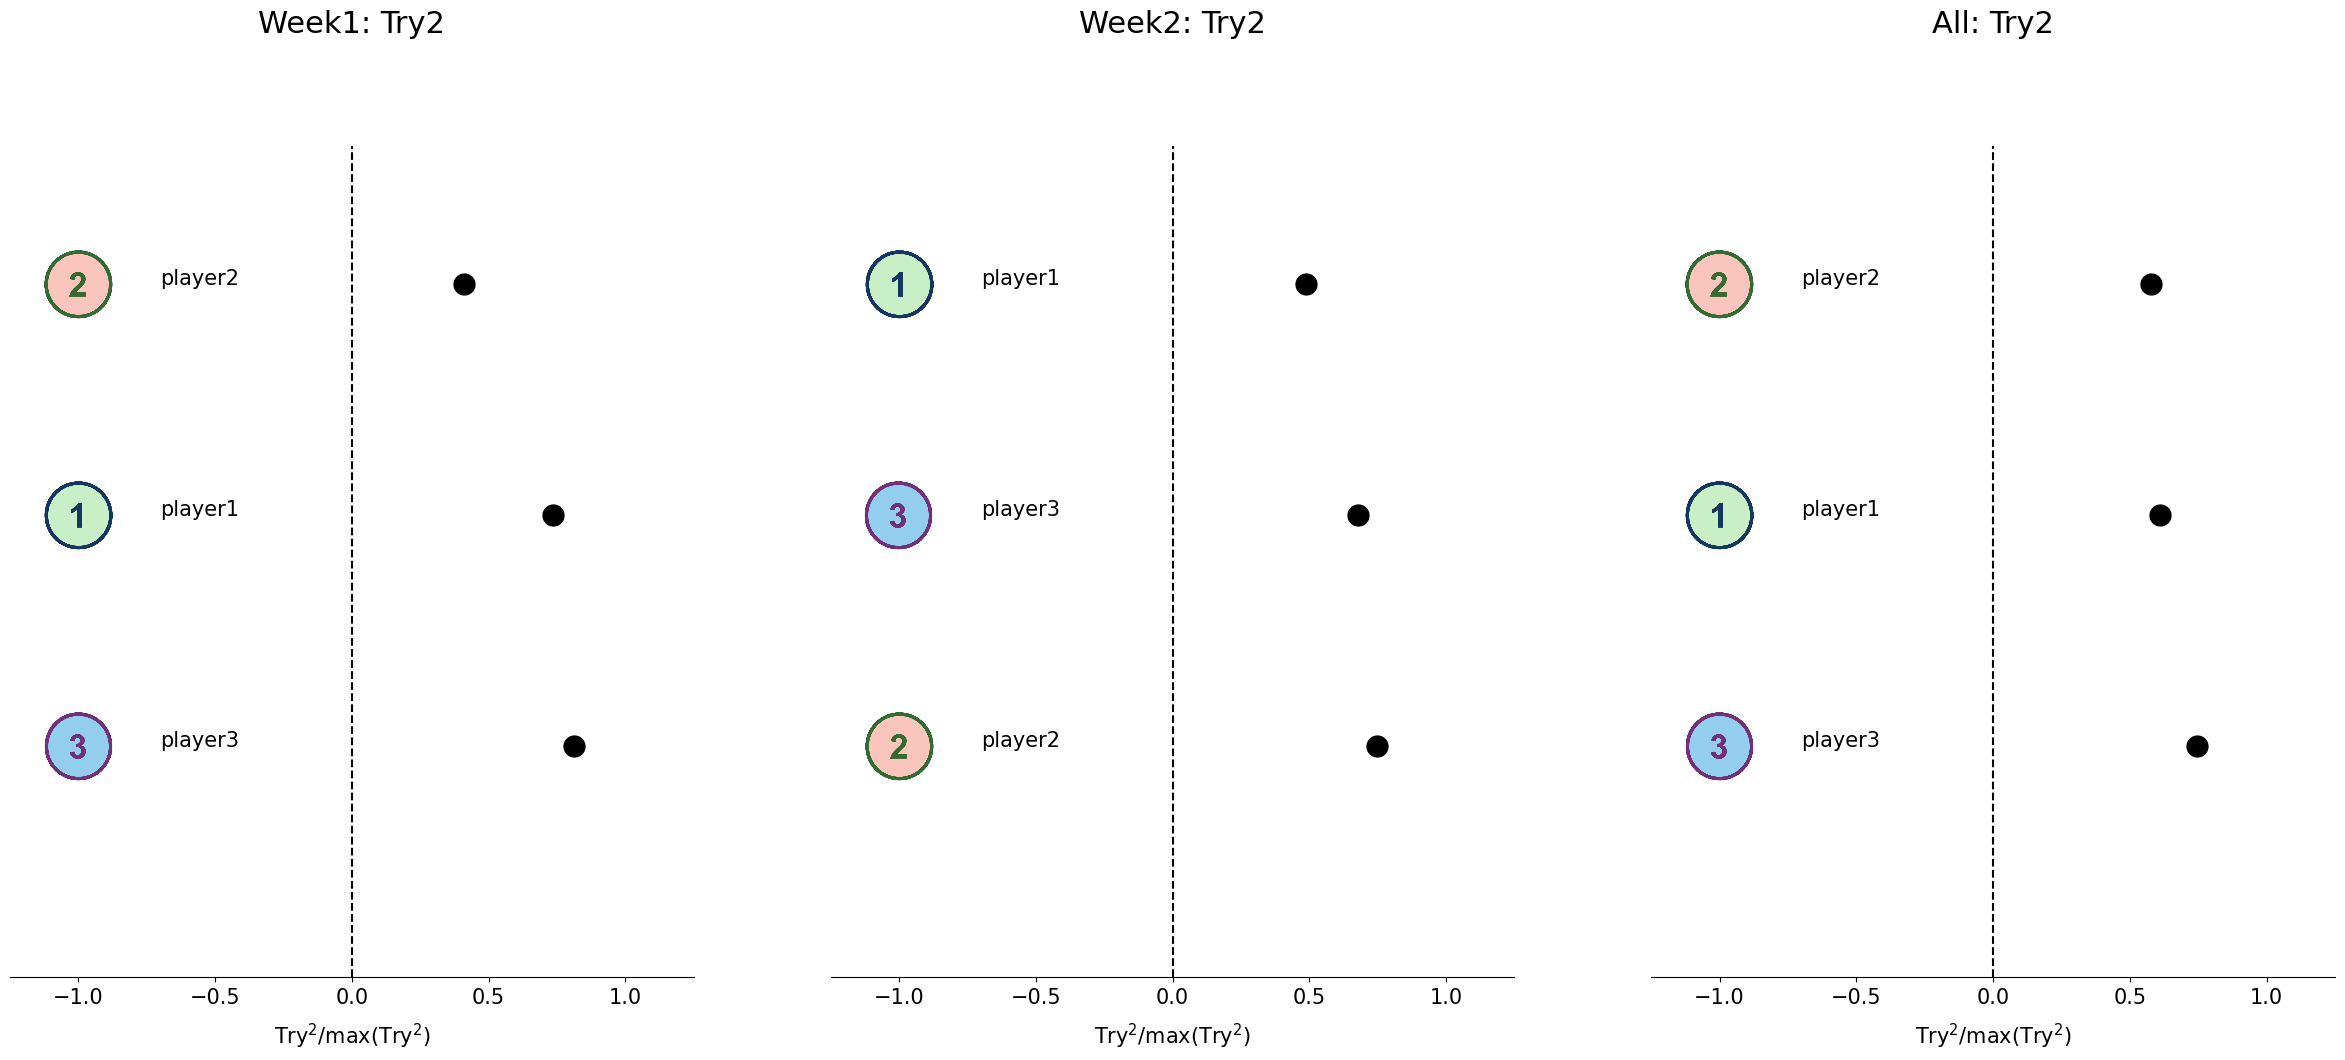

In [12]:
markers = player_markers #Pick the markers to use
n_weeks = 2
one_fig_width = 8.0
one_fig_height = 10.75
marginLR = 3.5
marginUD = 0.5
fig, axs = plt.subplots(1,n_weeks+1,figsize=((n_weeks+1)*10, 12))
plt.subplots_adjust(wspace=0.2)
plot_trysq(axs,game_info,all_try_sq,markers,draw_markers=True,title_pad=15)
fig.savefig("Plots/FullTrysquared/SixN_Trysq_AllWeeks_Example.png")
for i,ax in enumerate(axs):
    #extent = ax.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    custom_crop = Bbox(np.array([[marginLR + i*one_fig_width, marginUD],[marginLR + (i+1)*one_fig_width, marginUD+one_fig_height]])) #Do it manually
    if i < n_weeks:
        fig.savefig("Plots/FullTrysquared/SixN_Trysq_Week"+str(i+1)+"_Example.png", bbox_inches=custom_crop)
    else:
        fig.savefig("Plots/FullTrysquared/SixN_Trysq_All_Example.png", bbox_inches=custom_crop)

# Significance

In [13]:
# Make N random guesses for each game for each week
# Order toys and predictions and join together
# Calculate the Try^2 for all predictions and all toys
# Pull out only the toys and take the mean
rng = np.random.default_rng()
n_toys = 50000
guesses = {}
toys = {}
try_sq = {}
mean_avg_toy = {}
one_sigma = {}
two_sigma = {}
three_sigma = {}
do_norm = True

for week,info in game_info.items():
    guesses[week] = {}
    toys[week] = {}
    games = info[0]
    predictions = info[1]
    FinalScore = info[2]
    for game in games:
        guesses1 = rng.integers(low=0, high=50, size=n_toys)
        guesses2 = rng.integers(low=0, high=50, size=n_toys)
        guesses[week][game] = list(zip(guesses1,guesses2))

    for x in range(n_toys):
        toys[week][x] = {}
        for game in games:
            toys[week][x][game] = guesses[week][game][x]


    ordered_predictions = OrderedDict(predictions)
    ordered_toys = OrderedDict(toys[week])
    ordered_predictions.update(toys[week])
    
    try_sq[week],_ = calc_trysq(games,ordered_predictions,FinalScore,win_SF=0.9,do_norm=do_norm)
    combined_toys = []
    for x in range(n_toys):
        combined_toys.append(try_sq[week]["combined"][x])
    mean_avg_toy[week] = np.mean(combined_toys)
    print("Mean Try^2 for {}: {}".format(week,mean_avg_toy[week]))

    found1s = False
    found2s = False
    found3s = False
    for x in np.linspace(0.0, mean_avg_toy[week], num=1000):
        p_outside_below = np.argwhere(combined_toys < x).shape[0]
        if do_norm:
            p_outside_above= np.argwhere(combined_toys > 1.0-x).shape[0]
        else:
            p_outside_above= np.argwhere(combined_toys > np.max(combined_toys)-x).shape[0]
        inverted_sigma = (p_outside_below + p_outside_above)/len(combined_toys)
        if found3s == False and inverted_sigma > 1-0.997:
            print("{}: 3-sigma value = {}".format(week,x))
            three_sigma[week] = x
            found3s = True
        if found2s == False and inverted_sigma > 1-0.95:
            print("{}: 2-sigma value = {}".format(week,x))
            two_sigma[week] = x
            found2s = True
        if found1s == False and inverted_sigma > 1-0.68:
            print("{}: 1-sigma value = {}".format(week,x))
            one_sigma[week] = x
            found1s = True
            break

Mean Try^2 for Week1: 0.4425796798506772
Week1: 3-sigma value = 0.15328585508341774
Week1: 2-sigma value = 0.25252294045534135
Week1: 1-sigma value = 0.36859488852428773
Mean Try^2 for All: 0.4305221601038826
All: 3-sigma value = 0.22064799396715506
All: 2-sigma value = 0.2995124136858843
All: 1-sigma value = 0.3882887550086069
Mean Try^2 for Week2: 0.41931327550605757
Week2: 3-sigma value = 0.13977109183535252
Week2: 2-sigma value = 0.23379128574261668
Week2: 1-sigma value = 0.35257572715224056


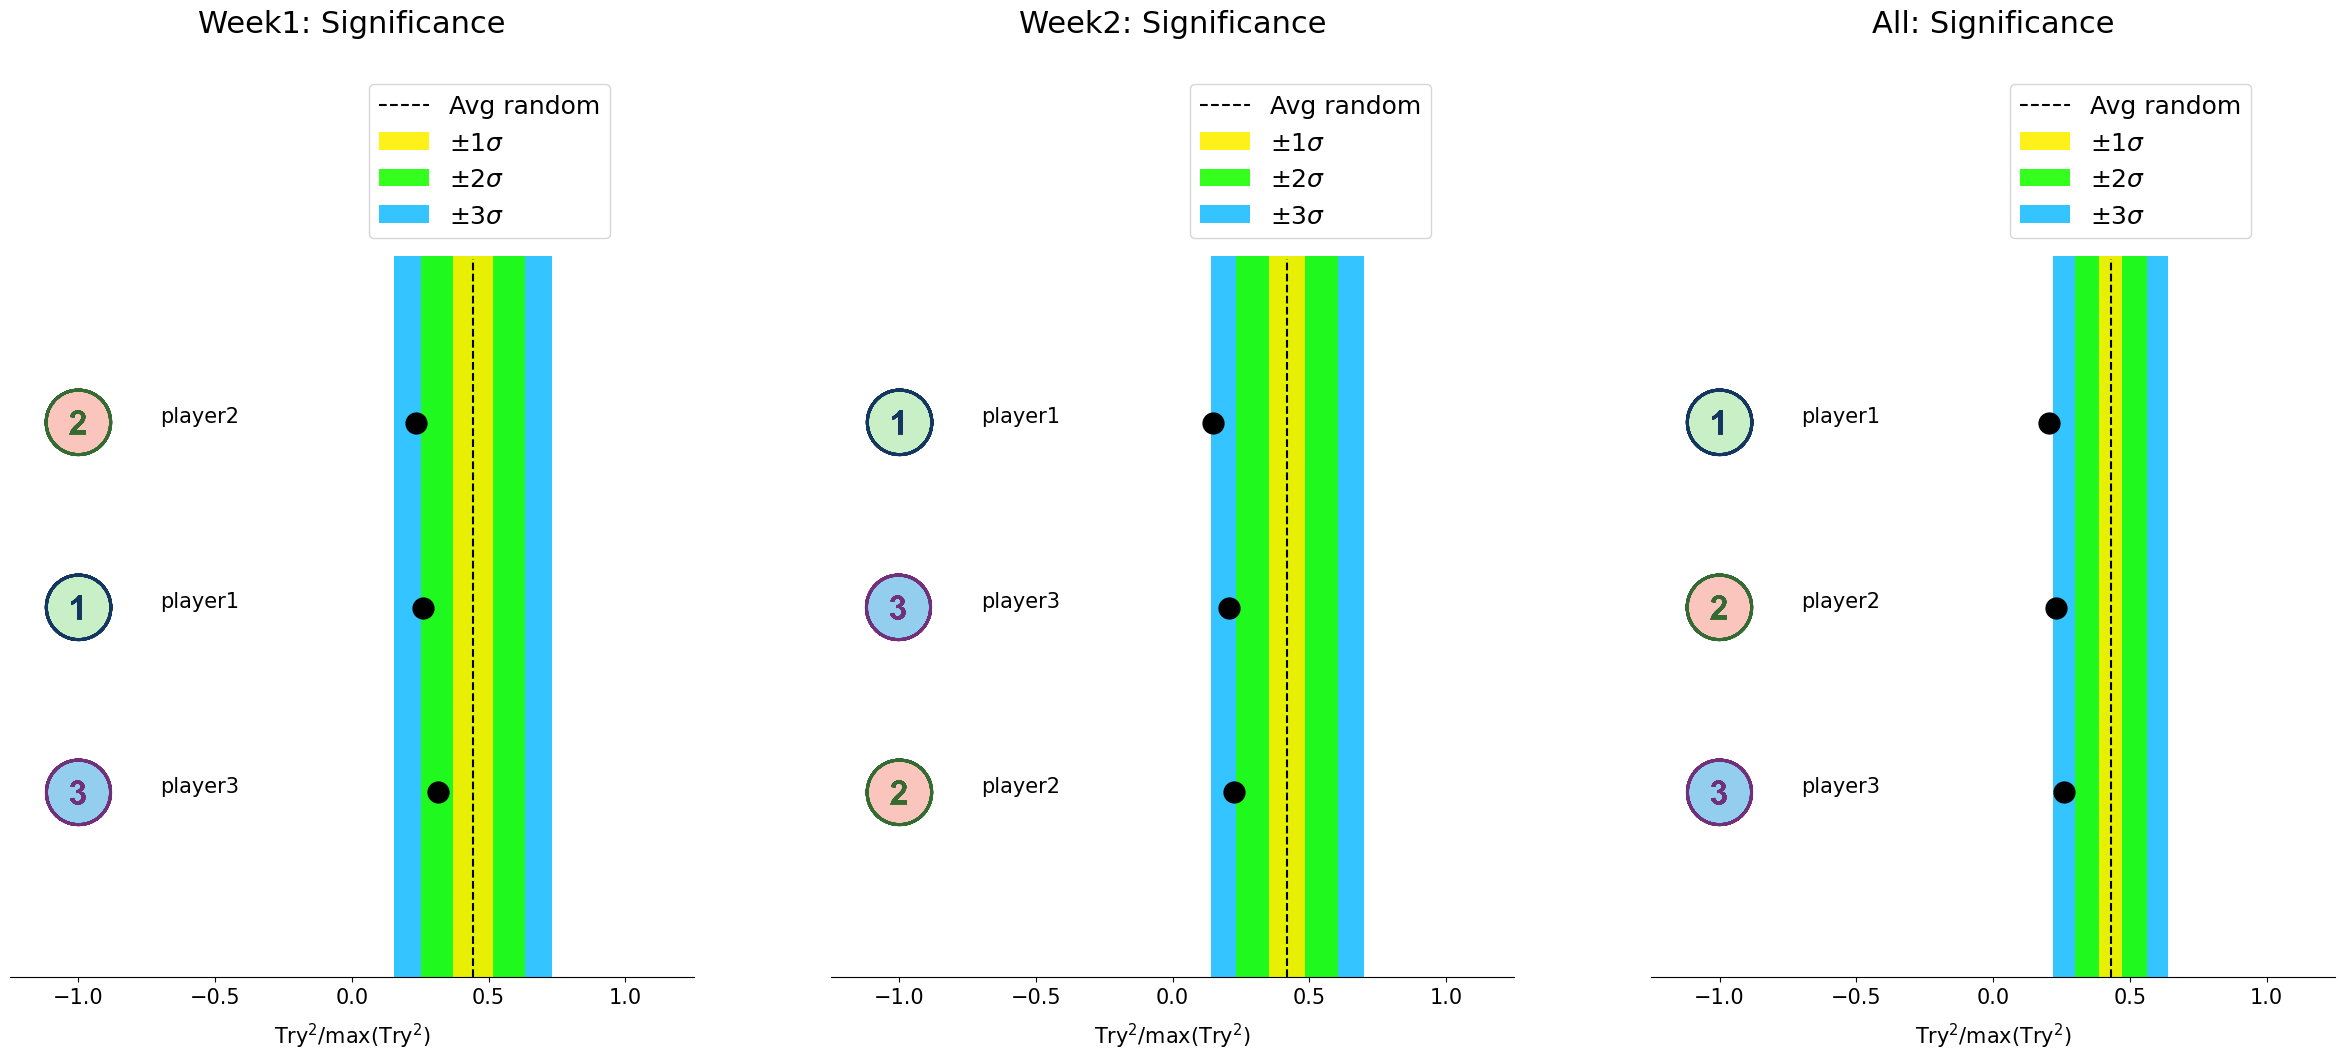

In [14]:
sigmas = [one_sigma,two_sigma,three_sigma]
markers = player_markers #Pick the markers to use
n_weeks = 2
one_fig_width = 8.15
one_fig_height = 10.75
marginLR = 3.5
marginUD = 0.5
fig, axs = plt.subplots(1,n_weeks+1,figsize=((n_weeks+1)*10, 12))
plt.subplots_adjust(wspace=0.2)
plot_significance(axs,n_toys,game_info,try_sq,mean_avg_toy,sigmas,markers,draw_markers=True,leg_offset=0.8)
fig.savefig("Plots/StatSignificance/SixN_StatSignificance_AllWeeks_Example.png")
for i,ax in enumerate(axs):
    #extent = ax.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    custom_crop = Bbox(np.array([[marginLR + i*one_fig_width, marginUD],[marginLR + (i+1)*one_fig_width, marginUD+one_fig_height]])) #Do it manually
    if i < n_weeks:
        fig.savefig("Plots/StatSignificance/SixN_StatSignificance_Week"+str(i+1)+"_Example.png", bbox_inches=custom_crop)
    else:
        fig.savefig("Plots/StatSignificance/SixN_StatSignificance_All_Example.png", bbox_inches=custom_crop)
